### Donwload the shape files for USFS National Grassland Units

In [161]:
import os # Interoperable file paths
import pathlib # Find the home folder
import zipfile # Work with zip files
from io import BytesIO # Stream binary (zip) files
from glob import glob # Find files by pattern
import requests # Request data over HTTP
from io import BytesIO # Stream binary (zip) files

import geopandas as gpd # Work with vector data
import hvplot.pandas # Interactive plots of vector data
import geoviews

import rioxarray as rxr
from rioxarray.merge import merge_arrays
from math import floor, ceil # Round values in one direction
import xarray as xr
import cartopy.crs as ccrs # CRSs

import matplotlib.pyplot as plt# Overlay plots
import earthaccess
import xrspatial

c:\Users\zachn\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'xrspatial'

In [2]:
# Define and create the project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'hab_suit'
)

os.makedirs(data_dir, exist_ok=True)
data_dir

'C:\\Users\\zachn\\earth-analytics\\data\\hab_suit'

In [ ]:
# Define info for redlining download
usfs_url = (
    'https://data.fs.usda.gov/'
    'geodata/edw/edw_resources/'
    'shp/S_USA.NationalGrassland.zip'
)

# Create a directory to the zip file
usfs_dir = os.path.join(
    data_dir, 
    'usfs'
)


#If the directory already exists, assume it is already downloaded
if not os.path.exists(usfs_dir):
    
    # Make the directory
    os.makedirs(usfs_dir, exist_ok=True)

    response = requests.get(usfs_url)
    # Ensure the request was successful
    response.raise_for_status()  

    # Save the uncompressed usfs data
    with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
        # Extract all files
        zip_ref.extractall(usfs_dir)


In [ ]:
# Define the path to the shape file
usfs_shp_path = glob(
    os.path.join(
        usfs_dir, 
        '*.shp'
    )
)[0] #Assume only one shape file, so pull the first

# Define the usfs gdf
usfs_sites_gdf = gpd.read_file(usfs_shp_path)

usfs_sites_gdf


,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
0,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.08409 44.28162, -100.08409 44.2..."
1,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.996 41.84049, -121.996 41..."
2,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30414 36.08063, -104.3041..."
3,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31081 46.51457, -97.30559 ..."
4,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82221 45.95896, -101.8170..."
5,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.91659 35.71892, -99.91661 ..."
6,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62993 36.44072, -102.6298..."
7,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46005 43.31908, -105.4601..."
8,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86003 35.20951, -100.86008 35.2..."
9,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85492 33.79814, -95.85494 ..."


### Define two grassland regions: Pawnee National Grassland and Rita Blanca National Grassland

In [ ]:
# Extract the gdf to for only the two National Grasslands

pawnee_gdf = usfs_sites_gdf[usfs_sites_gdf['GRASSLANDN'].isin(['Pawnee National Grassland'])]
rb_gdf = usfs_sites_gdf[usfs_sites_gdf['GRASSLANDN'].isin(['Rita Blanca National Grassland'])]

# Define the bounds of the two sites
pawnee_min_lon, pawnee_min_lat, pawnee_max_lon, pawnee_max_lat = (pawnee_gdf.total_bounds)
rb_min_lon, rb_min_lat, rb_max_lon, rb_max_lat = (rb_gdf.total_bounds)


array([-104.7914421 ,   40.60956304, -103.57328565,   41.00184675])

### Download relevant data from POLARIS

In [150]:
def polaris_download(unique_name, url_template, min_lat, max_lat, min_lon, max_lon):
    """
    downloads and save polaris files

    Parameters
    ----------
    unique_name : string
        unique identifier used in the file name (e.g. pawnee_ph).
    url_template : formatted string
        The polaris url containing places for {url_min_lat}{url_max_lat} and {url_min_lon}{url_max_lon}
    url_template : formatted string
        The polaris url containing places for {url_min_lat}{url_max_lat} and {url_min_lon}{url_max_lon}
    min_lat : float
       The minimum latitude to be included in the download
    max_lat : float
       The maximum latitude to be included in the download
    min_lon : float
       The minimum longitude to be included in the download
    max_lon : float
       The minimum longitude to be included in the download    
    
    Returns
    -------
    stitched_da
        a stiched da of all downloaded files

    """
    # Round the lat/lon
    f_min_lat = floor(min_lat)
    f_min_lon = floor(min_lon)
    c_max_lat = ceil(max_lat)
    c_max_lon = ceil(max_lon)

    # Define the da name template
    da_name_template = "{unique_name}_lat{url_min_lat}{url_max_lat}_lon{url_min_lon}{url_max_lon}"

    # Empty list to hold the URLs
    url_list = []
    da_name_list = []
    file_path_list = []

    # Create download and name lists
    for lon in range(f_min_lon, c_max_lon):
        for lat in range(f_min_lat, c_max_lat):
            ph_url = url_template.format(
                url_min_lat=lat, url_max_lat=lat+1,
                url_min_lon=lon, url_max_lon=lon+1
            )
            url_list.append(ph_url)

            da_name = da_name_template.format(
                unique_name=unique_name,
                url_min_lat=lat, url_max_lat=lat+1,
                url_min_lon=lon, url_max_lon=lon+1
                )
            
            da_name_list.append(da_name)

    #Define a directory to store the data. 
    polaris_dir = os.path.join(
        data_dir, 
        'polaris'
    )

    # Make the directory
    os.makedirs(polaris_dir, exist_ok=True)

    # Download all urls unless the file already exists in the dir
    for iDex, ph_url in enumerate(url_list):
        # Define the output path for the current file
        file_name = f"{da_name_list[iDex]}.tif"  # Assign unique names
        output_path = os.path.join(polaris_dir, file_name)
        
        # Populate the file path list
        file_path_list.append(output_path)

        if not os.path.exists(output_path):
            # Download and save the file
            response = requests.get(ph_url, stream=True)
            if response.status_code == 200:
                with open(output_path, "wb") as file:
                    for chunk in response.iter_content(chunk_size=8192): # Download in chunks
                        file.write(chunk)
                print(f"File successfully downloaded: {output_path}")
            else:
                print(f"Failed to download {ph_url}. Status code: {response.status_code}")
        else:
            print(f"File already exists: {output_path}")
    
    #Stich these files together into one da
    das = [
    rxr.open_rasterio(
        file, 
        masked=True
        ) 
        for file in file_path_list
    ]

    # Stich the das
    print('Stiching das together...')
    stitched_da = rxr.merge.merge_arrays(das)

    # Return the stiched da
    return stitched_da

In [151]:
# Define the POLARIS pH URL template
ph_url_template = (
    "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
    "/ph"
    "/mean"
    "/30_60"
    "/lat{url_min_lat}{url_max_lat}_lon{url_min_lon}{url_max_lon}.tif"
)

# Download the polaris ph data for Pawnee
pawnee_ph_da = polaris_download('pawnee_ph', ph_url_template, pawnee_min_lat, pawnee_max_lat, pawnee_min_lon, pawnee_max_lon)

# Download the polaris ph data for Rita Blanca
rb_ph_da = polaris_download('rb_ph', ph_url_template, rb_min_lat, rb_max_lat, rb_min_lon, rb_max_lon)



File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\pawnee_ph_lat4041_lon-105-104.tif
File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\pawnee_ph_lat4142_lon-105-104.tif
File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\pawnee_ph_lat4041_lon-104-103.tif
File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\pawnee_ph_lat4142_lon-104-103.tif
Stiching das together...
File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\rb_ph_lat3637_lon-104-103.tif
File already exists: C:\Users\zachn\earth-analytics\data\hab_suit\polaris\rb_ph_lat3637_lon-103-102.tif
Stiching das together...


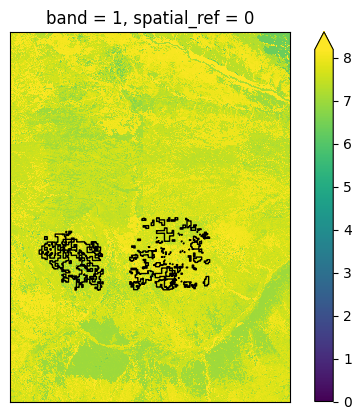

In [158]:
pawnee_plot_da = pawnee_ph_da.rio.reproject(ccrs.Mercator())
pawnee_plot_gdf = pawnee_gdf.to_crs(ccrs.Mercator())

pawnee_plot_da.plot(vmin=0, robust=True)
pawnee_plot_gdf.plot(ax=plt.gca(), color='none')
plt.gca().set(
    xlabel='', ylabel='', xticks=[], yticks=[]
)
plt.show()

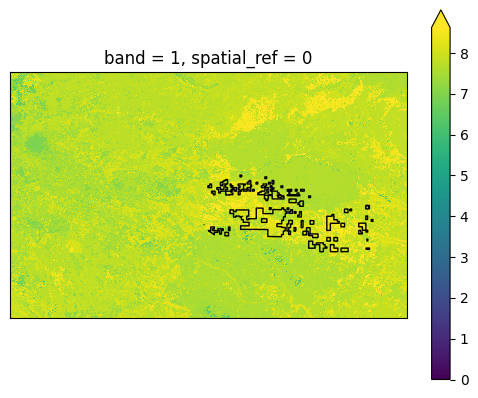

In [159]:
rb_plot_da = rb_ph_da.rio.reproject(ccrs.Mercator())
rb_plot_gdf = rb_gdf.to_crs(ccrs.Mercator())

rb_plot_da.plot(vmin=0, robust=True)
rb_plot_gdf.plot(ax=plt.gca(), color='none')
plt.gca().set(
    xlabel='', ylabel='', xticks=[], yticks=[]
)
plt.show()

### Download elevation data

In [ ]:
# Create a directory for srtm data
srtm_dir = os.path.join(
    data_dir, 
    'srtm'
)

os.makedirs(srtm_dir, exist_ok=True)

'C:\\Users\\zachn\\earth-analytics\\data\\hab_suit\\srtm'

In [ ]:
earthaccess.login()

In [ ]:
srtm_pattern = os.path.join(srtm_dir, '*.hgt.zip')
bounds = tuple(pawnee_gdf.total_bounds)

if not glob(srtm_pattern):

    srtm_results = earthaccess.search_data(
        short_name = "SRTMGL1",
        bounding_box = bounds
        )

srtm_results = earthaccess.download(srtm_results, srtm_dir)

srtm_results

QUEUEING TASKS | : 100%|██████████| 4/4 [00:00<00:00, 793.81it/s]
PROCESSING TASKS | : 100%|██████████| 4/4 [00:00<00:00, 1332.37it/s]
COLLECTING RESULTS | : 100%|██████████| 4/4 [00:00<?, ?it/s]


['C:\\Users\\zachn\\earth-analytics\\data\\hab_suit\\srtm\\N41W104.SRTMGL1.hgt.zip',
 'C:\\Users\\zachn\\earth-analytics\\data\\hab_suit\\srtm\\N40W104.SRTMGL1.hgt.zip',
 'C:\\Users\\zachn\\earth-analytics\\data\\hab_suit\\srtm\\N41W105.SRTMGL1.hgt.zip',
 'C:\\Users\\zachn\\earth-analytics\\data\\hab_suit\\srtm\\N40W105.SRTMGL1.hgt.zip']

<Axes: title={'center': 'spatial_ref = 0, band = 1'}, xlabel='x', ylabel='y'>

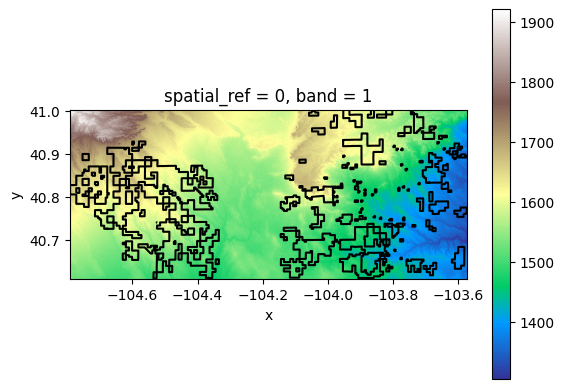

In [186]:
srtm_da_list = []

for srtm_path in glob(srtm_pattern):
        tile_da = rxr.open_rasterio(srtm_path, mask_and_scale=True).squeeze()
        cropped_da = tile_da.rio.clip_box(*bounds)
        srtm_da_list.append(cropped_da)

srtm_da = rxr.merge.merge_arrays(srtm_da_list)
srtm_da.plot(cmap='terrain')
pawnee_gdf.boundary.plot(ax=plt.gca(), color='black')
